### SMART thesis fig 5.7:
Shows the distribution of sunspot group areas for the different classes of flares. Let's try to do this - as well as making one for CMEs. Maybe using the CME Halo classes?

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
# Want data for flare GOES class and SRS area
dfs = df[['goes_flux', 'srs_area']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Converting SRS area into float values
dfs['srs_area'] = dfs['srs_area'].astype(float)

In [4]:
# There are some zero values in area column ---> converting to NaNs 
dfs.srs_area = dfs.srs_area.replace(0, np.nan, regex=True)

# Reindexing
dfs = dfs.reset_index(drop=True)

In [5]:
(dfs == 0).astype(float).sum(axis=0)

goes_flux    0.0
srs_area     0.0
dtype: float64

In [6]:
# Splitting up the different GOES classes --> logging the values for this
dfs.goes_flux = np.log10(dfs.goes_flux)

In [ ]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
a = dfs[ (dfs['goes_flux'] >= -8.0) & (dfs['goes_flux'] <= -7.0) ]  
b = dfs[ (dfs['goes_flux'] > -7.0) & (dfs['goes_flux'] <= -6.0) ]  
c = dfs[ (dfs['goes_flux'] > -6.0) & (dfs['goes_flux'] <= -5.0) ]  
m = dfs[ (dfs['goes_flux'] > -5.0) & (dfs['goes_flux'] <= -4.0) ]  
x = dfs[ (dfs['goes_flux'] > -4.0) & (dfs['goes_flux'] <= -3.0) ]

In [ ]:
# Plotting sunspot area
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(a.srs_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(b.srs_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(c.srs_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(m.srs_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(x.srs_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_xlim([0,3000])
ax.set_ylim([1,2000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'], fontsize=14)
ax.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

ax.legend(loc='best', fontsize=20)
plt.tight_layout()
#plt.savefig('srs_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### SMART areas

In [11]:
# Want data for flare GOES class and SRS area
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

In [12]:
(dfsm == 0).astype(float).sum(axis=0)

goes_flux           0.0
smart_total_area    0.0
dtype: float64

In [13]:
# Splitting up the different GOES classes --> logging the values for this
dfsm.goes_flux = np.log10(dfsm.goes_flux)

In [14]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
a2 = dfsm[ (dfsm['goes_flux'] >= -8.0) & (dfsm['goes_flux'] <= -7.0) ]  
b2 = dfsm[ (dfsm['goes_flux'] > -7.0) & (dfsm['goes_flux'] <= -6.0) ]  
c2 = dfsm[ (dfsm['goes_flux'] > -6.0) & (dfsm['goes_flux'] <= -5.0) ]  
m2 = dfsm[ (dfsm['goes_flux'] > -5.0) & (dfsm['goes_flux'] <= -4.0) ]  
x2 = dfsm[ (dfsm['goes_flux'] > -4.0) & (dfsm['goes_flux'] <= -3.0) ]  

In [15]:
# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
a2cm = a2.smart_total_area.values*3.0E16
b2cm = b2.smart_total_area.values*3.0E16
c2cm = c2.smart_total_area.values*3.0E16
m2cm = m2.smart_total_area.values*3.0E16
x2cm = x2.smart_total_area.values*3.0E16

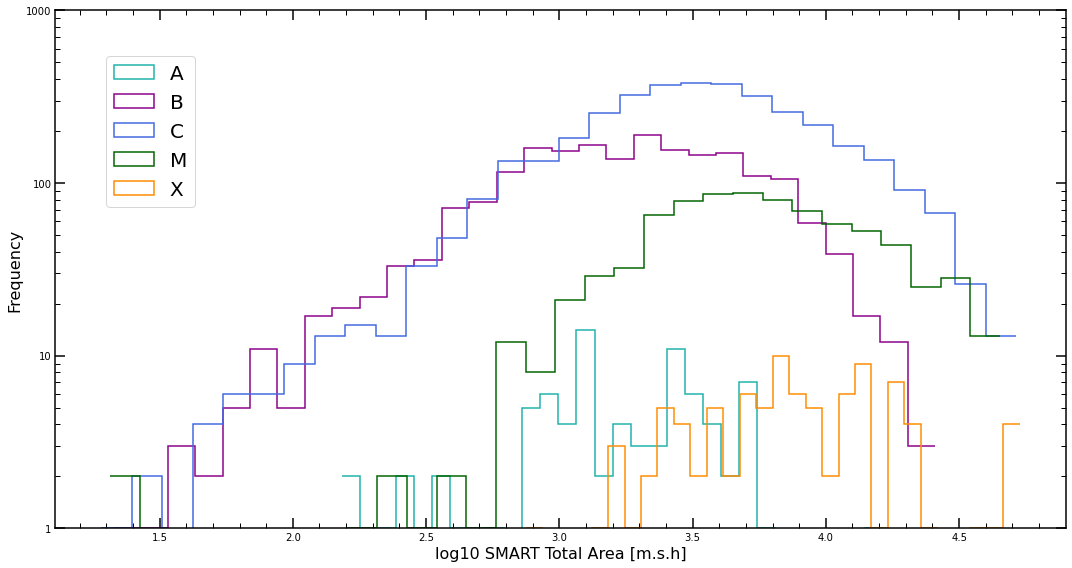

In [16]:
# Plotting sunspot area
fig2, ax2 = plt.subplots(figsize=(15, 8), facecolor='white')

na2, ba2, pa2 = ax2.hist(np.log10(a2.smart_total_area), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax2.hist(np.log10(b2.smart_total_area), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax2.hist(np.log10(c2.smart_total_area), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax2.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax2.hist(np.log10(x2.smart_total_area), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=16)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.legend(loc=[0.05,0.62], fontsize=20)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

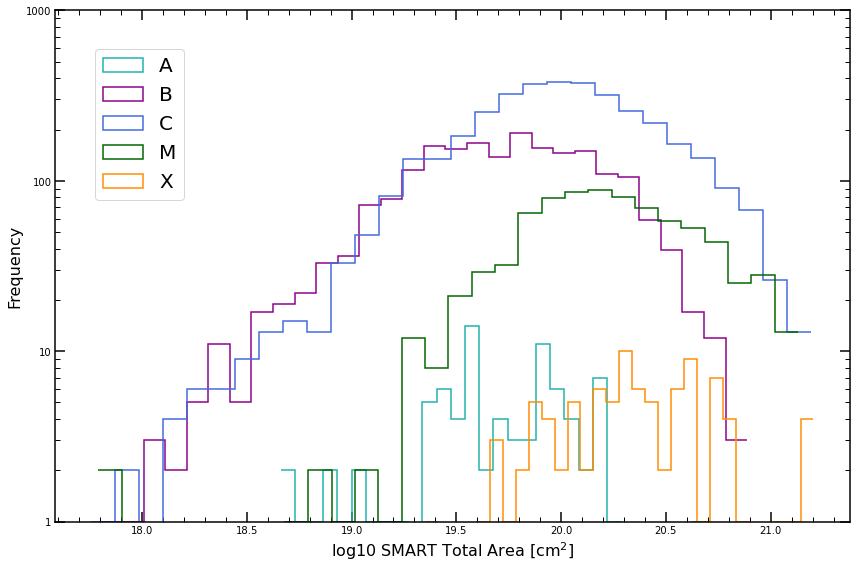

In [91]:
# Plotting sunspot area
fig2, ax2 = plt.subplots(figsize=(12, 8), facecolor='white')

#nat, bat, pat = ax2.hist(np.log10(dfsm.smart_total_area.values*3.0E16), 30, ec='grey', fc='none', lw=1.5, histtype='step', label='All')
na2, ba2, pa2 = ax2.hist(np.log10(a2cm), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax2.hist(np.log10(b2cm), 30, ec='darkmagenta', fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax2.hist(np.log10(c2cm), 30, ec='royalblue', fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax2.hist(np.log10(m2cm), 30, ec='darkgreen', fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax2.hist(np.log10(x2cm), 30, ec='darkorange', fc='none', lw=1.5, histtype='step', label='X')

#pat[0].set_xy(pat[0].get_xy()[1:-1])
pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.legend(loc=[0.05,0.63], fontsize=20)
#ax2.legend(loc=[0.045,0.75], fontsize=20)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_acm_log5.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

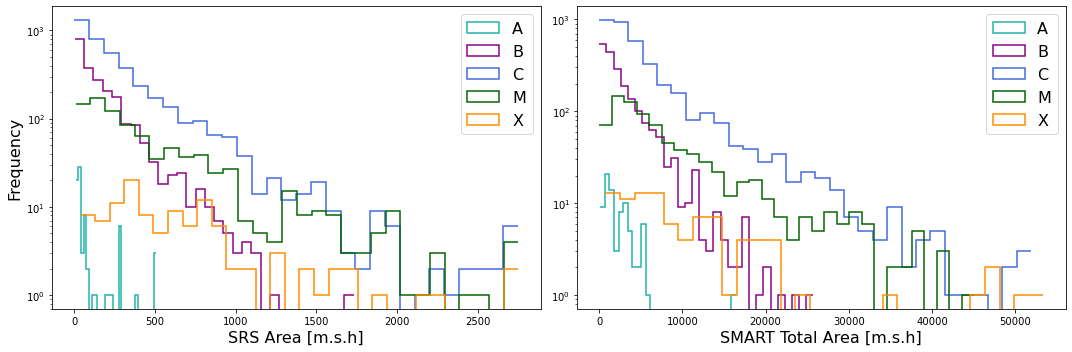

In [18]:
fig3, (ax3, ax4) = plt.subplots(1,2, figsize = (15,5), facecolor='white')

# SRS areas
na, ba, pa = ax3.hist(a.srs_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax3.hist(b.srs_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax3.hist(c.srs_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax3.hist(m.srs_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax3.hist(x.srs_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax3.set_ylabel('Frequency', fontsize=16)
ax3.legend(loc='best', fontsize=16)

# SMART areas
na2, ba2, pa2 = ax4.hist(a2.smart_total_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax4.hist(b2.smart_total_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax4.hist(c2.smart_total_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax4.hist(m2.smart_total_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax4.hist(x2.smart_total_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

ax4.set_yscale('log')
ax4.set_xlabel('SMART Total Area [m.s.h]', fontsize=16)
ax4.legend(loc='best', fontsize=16)

plt.tight_layout()
#plt.savefig('srs_smart_area.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## CME Halo's

In [19]:
# Want data for flare GOES class and SRS area
dfc = df[['cme_halo', 'smart_total_area']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

# Reindexing
dfc = dfc.reset_index(drop=True)

In [20]:
# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
dfc.smart_total_area = dfc.smart_total_area.values*3.0E16

In [21]:
one   = dfc[ (dfc['cme_halo'] == 1.0) ] 
two   = dfc[ (dfc['cme_halo'] == 2.0) ] 
three = dfc[ (dfc['cme_halo'] == 3.0) ] 
four  = dfc[ (dfc['cme_halo'] == 4.0) ] 

In [22]:
print(len(one.cme_halo) + len(two.cme_halo) + len(three.cme_halo) + len(four.cme_halo))
print(len(dfc.cme_halo))

6681
6681


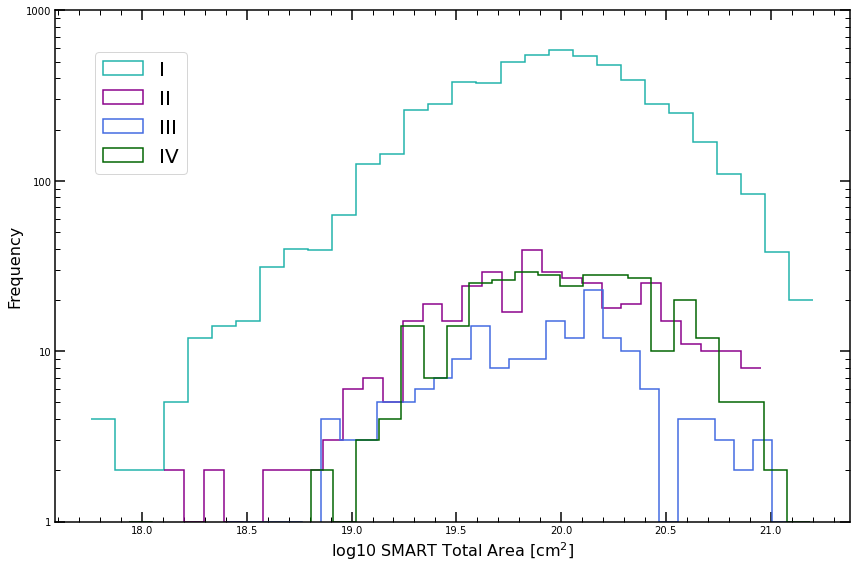

In [96]:
# Plotting sunspot area
figc, axc = plt.subplots(figsize=(12, 8), facecolor='white')

nac, bac, pac = axc.hist(np.log10(one.smart_total_area),   30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='I')
nbc, bbc, pbc = axc.hist(np.log10(two.smart_total_area),   30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='II')
ncc, bcc, pcc = axc.hist(np.log10(three.smart_total_area), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='III')
nmc, bmc, pmc = axc.hist(np.log10(four.smart_total_area),  30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='IV')

#nac, bac, pac = axc.hist(one.cme_halo,   30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='I')
#nbc, bbc, pbc = axc.hist(two.cme_halo,   30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='II')
#ncc, bcc, pcc = axc.hist(three.cme_halo, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='III')
#nmc, bmc, pmc = axc.hist(four.cme_halo,  30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='IV')

pac[0].set_xy(pac[0].get_xy()[1:-1])
pbc[0].set_xy(pbc[0].get_xy()[1:-1])
pcc[0].set_xy(pcc[0].get_xy()[1:-1])
pmc[0].set_xy(pmc[0].get_xy()[1:-1])

#axc.set_xscale('log')
axc.set_yscale('log')
axc.set_ylim([1,1000])
axc.set_yticks([1, 10, 100, 1000])
axc.set_yticklabels(['1', '10', '100', '1000'])

axc.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
axc.set_ylabel('Frequency', fontsize=16)
axc.legend(loc=[0.05,0.68], fontsize=20)

axc.xaxis.set_minor_locator(MultipleLocator(0.1))
axc.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
axc.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  axc.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm2.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## CME Speed, SMART total flux, R-value

In [24]:
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

In [25]:
max(dfsp.cme_speed)

3387.0

In [26]:
# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 1000) ]  
s2 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 2000) ]  
s3 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 3000) ]  
s4 = dfsp[ (dfsp.cme_speed > 3000) ]



"""
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 500)  ]  
s2 = dfsp[ (dfsp.cme_speed > 500)  & (dfsp.cme_speed <= 1000) ]  
s3 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 1500) ]  
s4 = dfsp[ (dfsp.cme_speed > 1500) & (dfsp.cme_speed <= 2000) ]  
s5 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 2500) ]
s6 = dfsp[ (dfsp.cme_speed > 2500) & (dfsp.cme_speed <= 3000) ]  
s7 = dfsp[ (dfsp.cme_speed > 3000) ] 
"""

'\ns1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 500)  ]  \ns2 = dfsp[ (dfsp.cme_speed > 500)  & (dfsp.cme_speed <= 1000) ]  \ns3 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 1500) ]  \ns4 = dfsp[ (dfsp.cme_speed > 1500) & (dfsp.cme_speed <= 2000) ]  \ns5 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 2500) ]\ns6 = dfsp[ (dfsp.cme_speed > 2500) & (dfsp.cme_speed <= 3000) ]  \ns7 = dfsp[ (dfsp.cme_speed > 3000) ] \n'

In [27]:
s1

,cme_speed,smart_total_area,smart_r_value,smart_total_flux
0,477.0,5.855505e+20,837803.06,1.41e+23
1,469.0,2.374020e+19,5284.00,4.85e+21
2,354.0,1.156590e+19,3472.00,2.73e+21
3,272.0,6.163950e+19,16358.65,1.32e+22
4,312.0,6.269880e+19,16784.24,1.29e+22
...,...,...,...,...
6662,93.0,2.583150e+19,30690.80,1.22e+22
6663,338.0,2.492220e+19,20444.30,1.16e+22
6664,306.0,2.187060e+19,11323.36,1.02e+22
6665,278.0,2.187060e+19,11323.36,1.02e+22


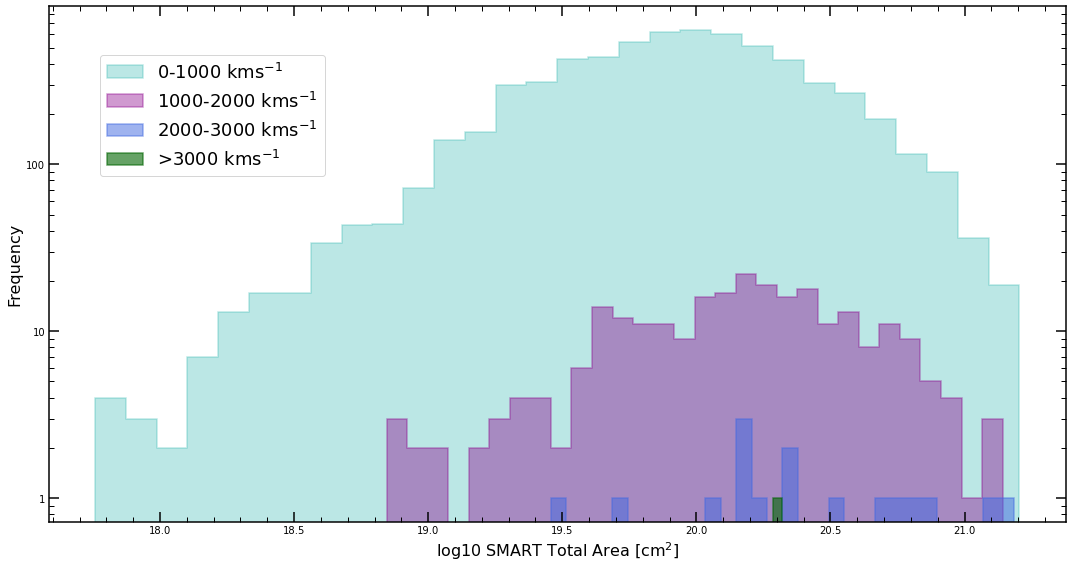

In [28]:
# Plotting sunspot area with relation to CME speed
fig3, ax3 = plt.subplots(figsize=(15, 8), facecolor='white')

na3, ba3, pa3 = ax3.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb3, bb3, pb3 = ax3.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc3, bc3, pc3 = ax3.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm3, bm3, pm3 = ax3.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax3.set_yscale('log')
ax3.set_yticks([1, 10, 100])
ax3.set_yticklabels(['1', '10', '100'])

ax3.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax3.set_ylabel('Frequency', fontsize=16)
ax3.legend(loc=[0.05,0.67], fontsize=18)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax3.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax3.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

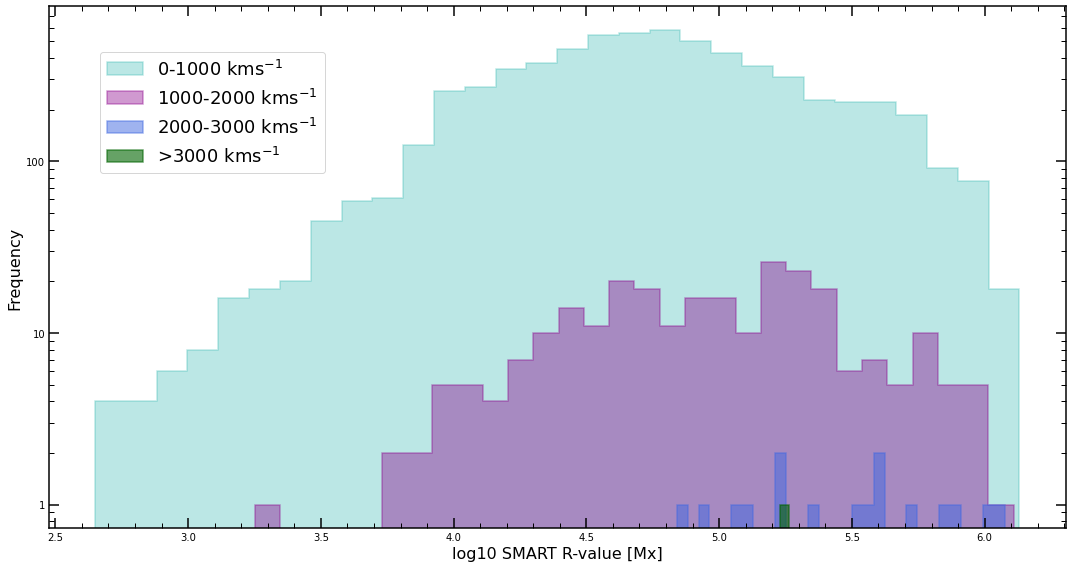

In [120]:
# Plotting r-value with relation to CME speed
fig4, ax4 = plt.subplots(figsize=(15, 8), facecolor='white')

na4, ba4, pa4 = ax4.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb4, bb4, pb4 = ax4.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc4, bc4, pc4 = ax4.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm4, bm4, pm4 = ax4.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax4.set_yscale('log')
ax4.set_yticks([1, 10, 100])
ax4.set_yticklabels(['1', '10', '100'])

ax4.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax4.set_ylabel('Frequency', fontsize=16)
ax4.legend(loc=[0.05,0.68], fontsize=18)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax4.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax4.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

In [123]:
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

In [124]:
# Splitting up the different GOES classes --> logging the values for this
dfq.goes_flux = np.log10(dfq.goes_flux)

In [125]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
aq = dfq[ (dfq['goes_flux'] >= -8.0) & (dfq['goes_flux'] <= -7.0) ]  
bq = dfq[ (dfq['goes_flux'] > -7.0) & (dfq['goes_flux'] <= -6.0) ]  
cq = dfq[ (dfq['goes_flux'] > -6.0) & (dfq['goes_flux'] <= -5.0) ]  
mq = dfq[ (dfq['goes_flux'] > -5.0) & (dfq['goes_flux'] <= -4.0) ]  
xq = dfq[ (dfq['goes_flux'] > -4.0) & (dfq['goes_flux'] <= -3.0) ]  

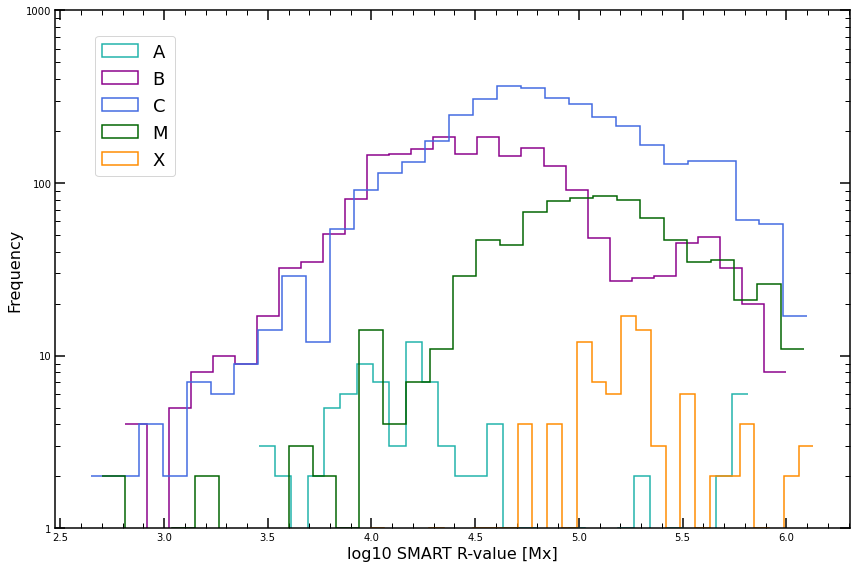

In [134]:
# Plotting r-value with relation to CME speed
figq, axq = plt.subplots(figsize=(12, 8), facecolor='white')

naq, baq, paq = axq.hist(np.log10(aq.smart_r_value), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nbq, bbq, pbq = axq.hist(np.log10(bq.smart_r_value), 30, ec='darkmagenta', fc='none', lw=1.5, histtype='step', label='B')
ncq, bcq, pcq = axq.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='none', lw=1.5, histtype='step', label='C')
nmq, bmq, pmq = axq.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='none', lw=1.5, histtype='step', label='M')
nxq, bxq, pxq = axq.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='none', lw=1.5, histtype='step', label='X')

paq[0].set_xy(paq[0].get_xy()[1:-1])
pbq[0].set_xy(pbq[0].get_xy()[1:-1])
pcq[0].set_xy(pcq[0].get_xy()[1:-1])
pmq[0].set_xy(pmq[0].get_xy()[1:-1])
pxq[0].set_xy(pxq[0].get_xy()[1:-1])

axq.set_yscale('log')
axq.set_ylim([1,1000])
axq.set_yticks([1, 10, 100, 1000])
axq.set_yticklabels(['1', '10', '100', '1000'])

axq.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
axq.set_ylabel('Frequency', fontsize=16)
axq.legend(loc=[0.05,0.68], fontsize=18)

axq.xaxis.set_minor_locator(MultipleLocator(0.1))
axq.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
axq.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  axq.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value2.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

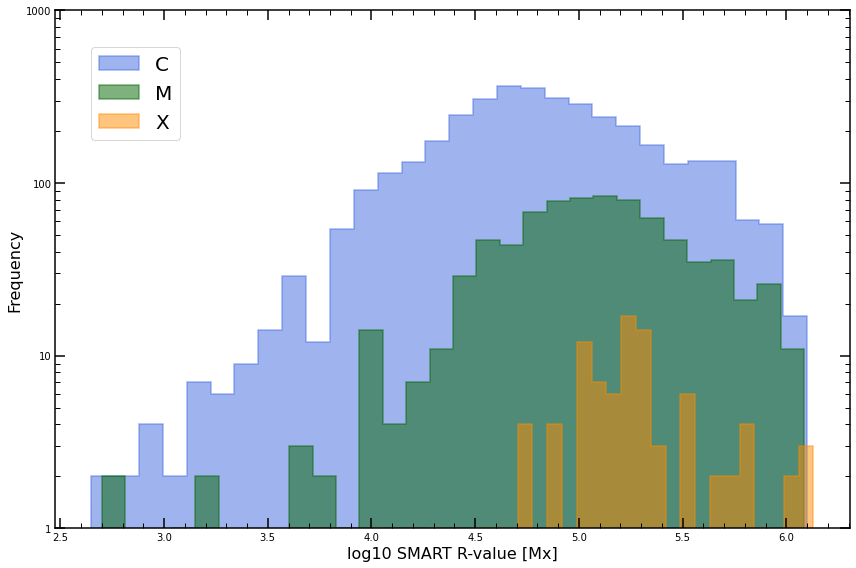

In [133]:
# Plotting r-value with relation to CME speed
figq, axq = plt.subplots(figsize=(12, 8), facecolor='white')

ncq, bcq, pcq = axq.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                         label='C', alpha=0.5)
nmq, bmq, pmq = axq.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                         label='M', alpha=0.5)
nxq, bxq, pxq = axq.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                         label='X', alpha=0.5)

pcq[0].set_xy(pcq[0].get_xy()[1:-1])
pmq[0].set_xy(pmq[0].get_xy()[1:-1])
pxq[0].set_xy(pxq[0].get_xy()[1:-1])

axq.set_yscale('log')
axq.set_ylim([1,1000])
axq.set_yticks([1, 10, 100, 1000])
axq.set_yticklabels(['1', '10', '100', '1000'])

axq.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
axq.set_ylabel('Frequency', fontsize=16)
axq.legend(loc=[0.045,0.75], fontsize=20)

axq.xaxis.set_minor_locator(MultipleLocator(0.1))
axq.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
axq.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  axq.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value3.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

In [37]:
# total flux is an object ---> should probably change this in original database!
dfsp.smart_total_flux = dfsp.smart_total_flux.astype(float)

In [42]:
max(dfsp.smart_total_flux)

4.39e+23

In [43]:
# Splitting up the total flux
f1 = dfsp[ (dfsp.smart_total_flux > 1.0E20) & (dfsp.smart_total_flux <= 1.0E21) ]  
f2 = dfsp[ (dfsp.smart_total_flux > 1.0E21) & (dfsp.smart_total_flux <= 1.0E22) ]  
f3 = dfsp[ (dfsp.smart_total_flux > 1.0E22) & (dfsp.smart_total_flux <= 1.0E23) ]  
f4 = dfsp[ (dfsp.smart_total_flux > 1.0E23) ]

In [45]:
len(f1.smart_total_flux) + len(f2.smart_total_flux) + len(f3.smart_total_flux) + len(f4.smart_total_flux)

6667

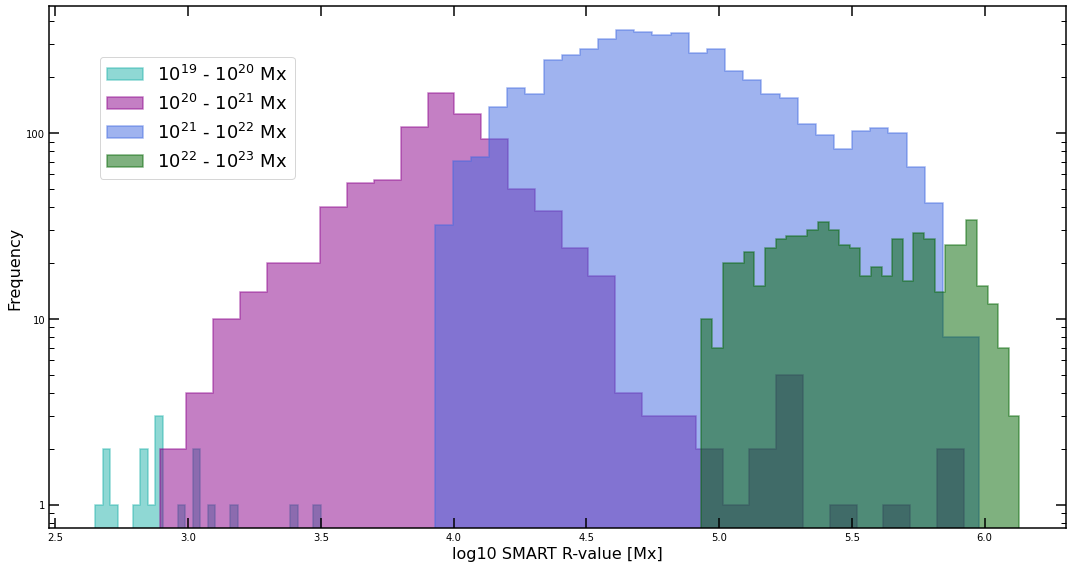

In [50]:
# Plotting r-value with relation to total flux
fig5, ax5 = plt.subplots(figsize=(15, 8), facecolor='white')

na5, ba5, pa5 = ax5.hist(np.log10(f1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.5, label='10$^{19}$ - 10$^{20}$ Mx')
nb5, bb5, pb5 = ax5.hist(np.log10(f2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.5, label='10$^{20}$ - 10$^{21}$ Mx')
nc5, bc5, pc5 = ax5.hist(np.log10(f3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='10$^{21}$ - 10$^{22}$ Mx')
nm5, bm5, pm5 = ax5.hist(np.log10(f4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.5, label='10$^{22}$ - 10$^{23}$ Mx')

ax5.set_yscale('log')
ax5.set_yticks([1, 10, 100])
ax5.set_yticklabels(['1', '10', '100'])

ax5.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax5.set_ylabel('Frequency', fontsize=16)
ax5.legend(loc=[0.05,0.67], fontsize=18)

#ax5.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax5.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax5.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

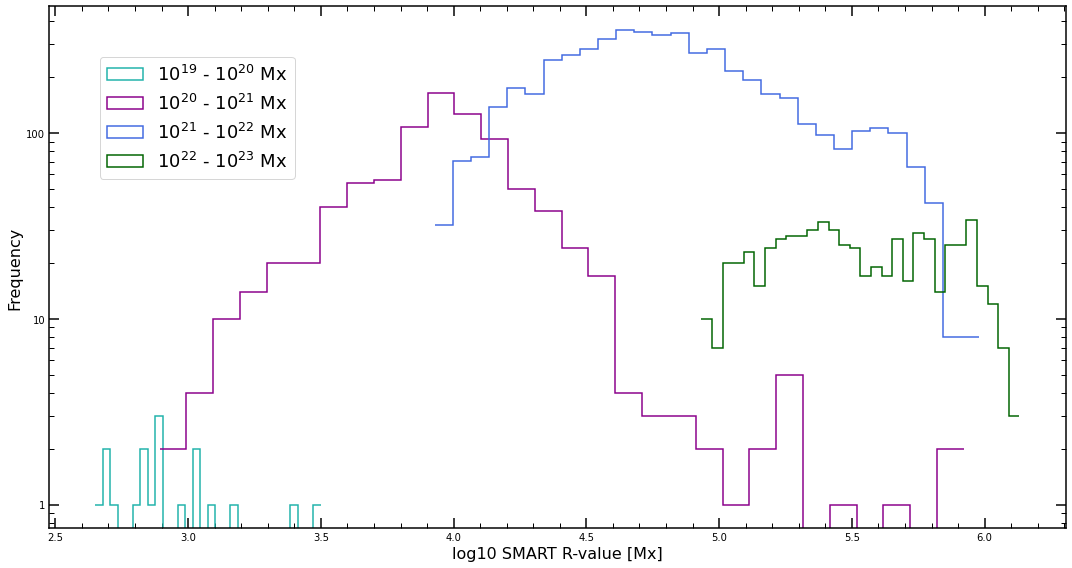

In [49]:
# Plotting r-value with relation to total flux
fig5, ax5 = plt.subplots(figsize=(15, 8), facecolor='white')

na5, ba5, pa5 = ax5.hist(np.log10(f1.smart_r_value), 30, histtype='step',
                         ec='lightseagreen', fc='none', lw=1.5, label='10$^{19}$ - 10$^{20}$ Mx')
nb5, bb5, pb5 = ax5.hist(np.log10(f2.smart_r_value), 30, histtype='step',
                         ec='darkmagenta', fc='none', lw=1.5, label='10$^{20}$ - 10$^{21}$ Mx')
nc5, bc5, pc5 = ax5.hist(np.log10(f3.smart_r_value), 30, histtype='step',
                         ec='royalblue', fc='none', lw=1.5, label='10$^{21}$ - 10$^{22}$ Mx')
nm5, bm5, pm5 = ax5.hist(np.log10(f4.smart_r_value), 30, histtype='step',
                         ec='darkgreen', fc='none', lw=1.5, label='10$^{22}$ - 10$^{23}$ Mx')

pa5[0].set_xy(pa5[0].get_xy()[1:-1])
pb5[0].set_xy(pb5[0].get_xy()[1:-1])
pc5[0].set_xy(pc5[0].get_xy()[1:-1])
pm5[0].set_xy(pm5[0].get_xy()[1:-1])

ax5.set_yscale('log')
ax5.set_yticks([1, 10, 100])
ax5.set_yticklabels(['1', '10', '100'])

ax5.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax5.set_ylabel('Frequency', fontsize=16)
ax5.legend(loc=[0.05,0.67], fontsize=18)

ax5.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax5.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax5.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## SMART tot flux on x-axis, with flare classes

In [105]:
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

In [106]:
# total flux is an object ---> should probably change this in original database!
df2.smart_total_flux = df2.smart_total_flux.astype(float)

In [107]:
# Splitting up the different GOES classes --> logging the values for this
df2.goes_flux = np.log10(df2.goes_flux)

In [108]:
(df2 == 0).astype(int).sum(axis=0)

goes_flux           0
smart_total_flux    0
dtype: int64

In [109]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
af = df2[ (df2['goes_flux'] >= -8.0) & (df2['goes_flux'] <= -7.0) ]  
bf = df2[ (df2['goes_flux'] > -7.0) & (df2['goes_flux'] <= -6.0) ]  
cf = df2[ (df2['goes_flux'] > -6.0) & (df2['goes_flux'] <= -5.0) ]  
mf = df2[ (df2['goes_flux'] > -5.0) & (df2['goes_flux'] <= -4.0) ]  
xf = df2[ (df2['goes_flux'] > -4.0) & (df2['goes_flux'] <= -3.0) ]  

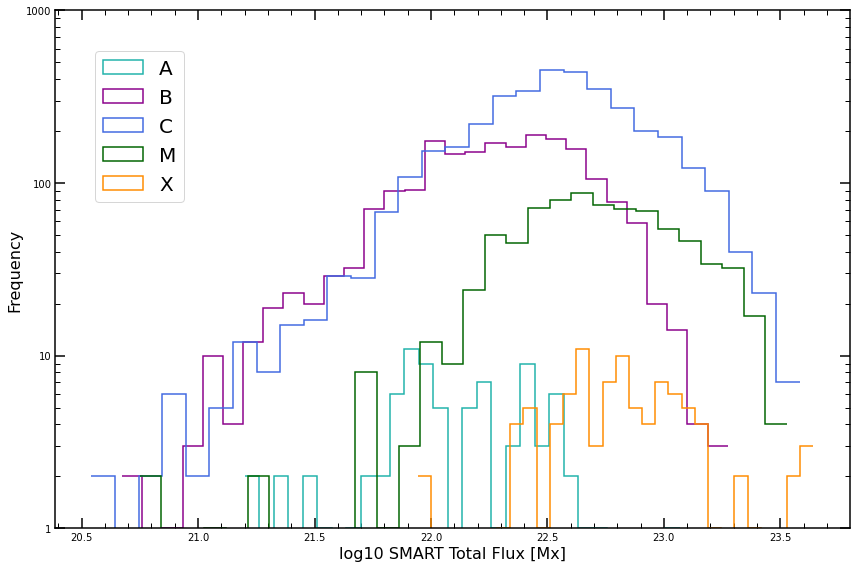

In [118]:
# Plotting sunspot area
fig2, ax2 = plt.subplots(figsize=(12, 8), facecolor='white')

na2, ba2, pa2 = ax2.hist(np.log10(af.smart_total_flux), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax2.hist(np.log10(bf.smart_total_flux), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax2.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax2.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax2.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=16)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.legend(loc=[0.05,0.63], fontsize=20)
#ax2.legend(loc=[0.045,0.75], fontsize=20)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('smart_flux_class.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()